# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city.replace(" ","+") + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | moussoro
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | guangyuan
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | qui nhon
Processing Record 16 of Set 1 | teahupoo
Processing Record 17 of Set 1 | suibara
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | bambous viri

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,300.52,71,20,3.72,KI,1678999220
1,bluff,-46.6000,168.3333,285.82,93,66,7.65,NZ,1678999221
2,vaini,-21.2000,-175.2000,300.24,78,75,5.66,TO,1678999222
3,tiksi,71.6872,128.8694,261.81,81,100,8.32,RU,1678999224
4,qaanaaq,77.4840,-69.3632,253.60,97,100,1.13,GL,1678999226


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,300.52,71,20,3.72,KI,1678999220
1,bluff,-46.6000,168.3333,285.82,93,66,7.65,NZ,1678999221
2,vaini,-21.2000,-175.2000,300.24,78,75,5.66,TO,1678999222
3,tiksi,71.6872,128.8694,261.81,81,100,8.32,RU,1678999224
4,qaanaaq,77.4840,-69.3632,253.60,97,100,1.13,GL,1678999226


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

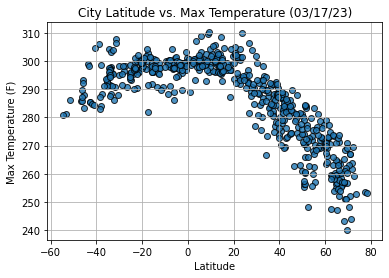

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

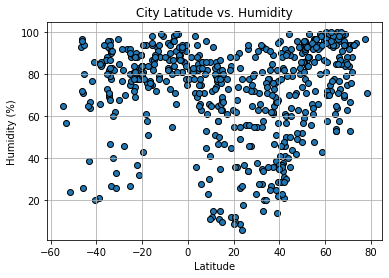

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set the title and axis labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

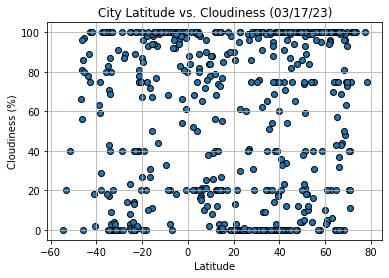

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set the title and axis labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

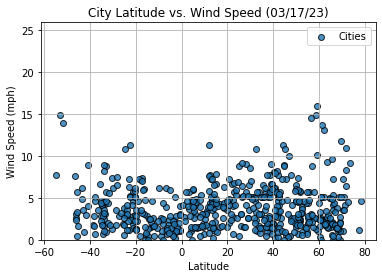

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# Set the chart title, x label, and y label
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y limits
plt.ylim(0, max(city_data_df["Wind Speed"])+10)

# Add a grid to the chart
plt.grid(True)

# Show the legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create the plot
    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, color='red')
    
    # Add labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    # Add coordinates of the equation
    ax.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", coordinates, color='red')
    
    # Print the r-value
    print(f"The r-value is: {r_value}")
    
    # Show the plot
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,300.52,71,20,3.72,KI,1678999220
3,tiksi,71.6872,128.8694,261.81,81,100,8.32,RU,1678999224
4,qaanaaq,77.4840,-69.3632,253.60,97,100,1.13,GL,1678999226
7,nikolskoye,59.7035,30.7861,269.09,97,10,1.09,RU,1678999229
8,moussoro,13.6408,16.4901,300.29,11,3,5.15,TD,1678999230


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,285.82,93,66,7.65,NZ,1678999221
2,vaini,-21.2000,-175.2000,300.24,78,75,5.66,TO,1678999222
5,saint-joseph,-21.3667,55.6167,296.36,78,78,1.89,RE,1678999228
6,hobart,-42.8794,147.3294,285.52,67,75,3.60,AU,1678999229
9,tual,-5.6667,132.7500,301.16,71,92,2.38,ID,1678998967


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8965697242671815


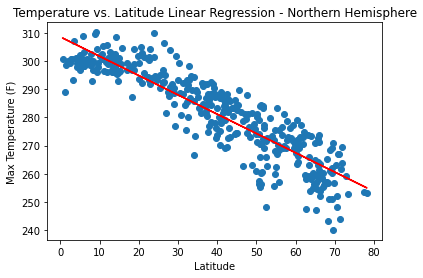

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
title = "Temperature vs. Latitude Linear Regression - Northern Hemisphere"
coordinates = (0, -40)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


The r-value is: 0.4527768015759454


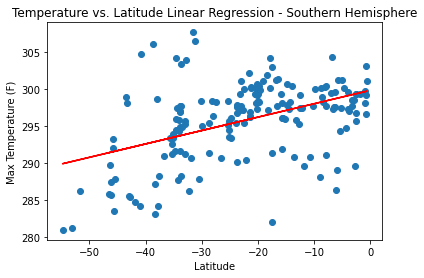

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
title = "Temperature vs. Latitude Linear Regression - Southern Hemisphere"
coordinates = (-50, 90)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


**Discussion about the linear relationship:** For the Northern Hemisphere, there is a strong negative linear relationship between temperature and latitude. This means that as you move away from the equator towards the North Pole, the temperature drops significantly. The r-value of -0.8965 indicates that the correlation between temperature and latitude is quite strong.

For the Southern Hemisphere, there is a moderate positive linear relationship between temperature and latitude. This means that as you move closer to the equator from the South Pole, the temperature increases. The r-value of 0.4528 indicates that the correlation between temperature and latitude is moderately positive.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32871380442997267


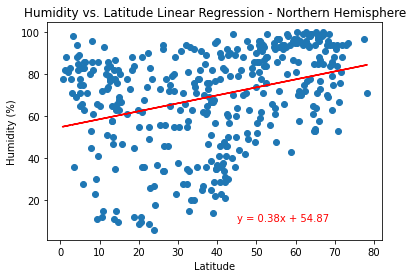

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Humidity vs. Latitude Linear Regression - Northern Hemisphere"
coordinates = (45, 10)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


The r-value is: 0.34794257959669855


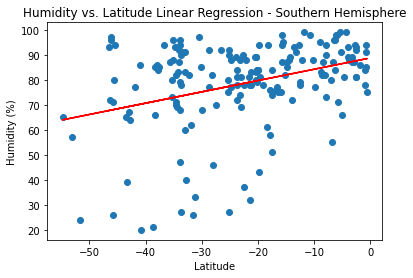

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Humidity vs. Latitude Linear Regression - Southern Hemisphere"
coordinates = (-50, 15)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


**Discussion about the linear relationship:** we can see that there is a weak positive correlation in both hemispheres, which suggests that there is no strong relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18137919138726766


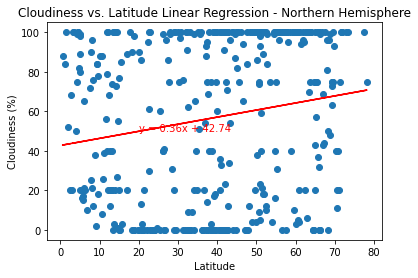

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Cloudiness vs. Latitude Linear Regression - Northern Hemisphere"
coordinates = (20, 50)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


The r-value is: 0.29331798140595233


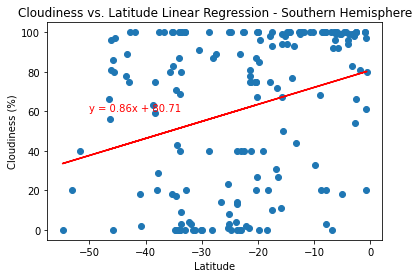

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Cloudiness vs. Latitude Linear Regression - Southern Hemisphere"
coordinates = (-50, 60)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


**Discussion about the linear relationship:** we can see that there is a weak positive correlation in both hemispheres, which suggests that there is no strong relationship between cloudiness and latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01599974539125133


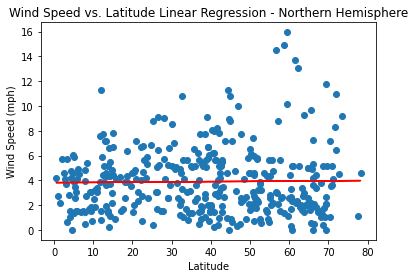

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Wind Speed vs. Latitude Linear Regression - Northern Hemisphere"
coordinates = (40, 25)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


The r-value is: -0.37240751357236207


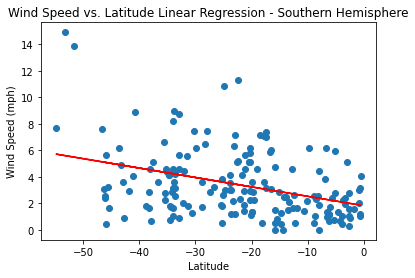

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Wind Speed vs. Latitude Linear Regression - Southern Hemisphere"
coordinates = (-50, 20)
plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates)


**Discussion about the linear relationship:** we can observe that there is no strong correlation between these two variables in either hemisphere, as shown by the low absolute values of the r-values. This means that there is no significant relationship between wind speed and latitude.